<a href="https://colab.research.google.com/github/mhkim7144/todolist/blob/master/FacialAge_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initialize

구글 Drive 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


efficientnet 설치

In [ ]:
pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16030 sha256=26852e6b089fca47894a6ee781fbb06a54e4000f242e01325ecd7548bf7934ab
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


torchvision 설치

In [ ]:
pip install torch torchvision

cuda 

In [ ]:
import torch
torch.cuda.is_available()

True

pytorch 버전

In [ ]:
import torch
print(torch.__version__)

1.7.0+cu101


디바이스 정보

In [ ]:
import torch

if torch.cuda.is_available():
  device_count = torch.cuda.device_count()
  print("device_count: {}".format(device_count))
  for device_num in range(device_count):
    print("device {} capability {}".format(
        device_num, torch.cuda.get_device_capability(device_num)))
    print("device {} name {}".format(
        device_num, torch.cuda.get_device_name(device_num)))
else:
  print("no cuda device")

device_count: 1
device 0 capability (7, 5)
device 0 name Tesla T4


Data set 불러오기

In [ ]:
cd/content/drive/My Drive/

/content/drive/My Drive


In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
ls

 서브프로젝트/
 개인프로젝트/
 중간프로젝트/
 0/
 개인프로젝트연습1/
 10/
 15/
 20/
 201533002김명헌/
 201533002김명헌_개인프로젝트/
 201533002김명헌_project.zip
'2019 컴퓨터과학과 동아리 압축'/
 25/
 2F2F7661-BB52-4646-B016-965F4C2C1D75.jpeg
 30/
 35/
 40/
 45/
 5/
 50/
 55/
 60/
 65/
 70/
'Colab Notebooks'/
 data/
'data (1)'/
 Dataset/
 data.zip
 F5A1257E-56AB-45D3-9F2F-91241393A85A.jpeg
 face.zip
 facial_age/
'FacialAge (1).ipynb'
'김명헌(최종) 개인지원서.hwp'
 경기도재난기본소득_선불카드신청서.hwp
'MarkAny e-PageSAFER Zero Client V2.5.pdf'
 졸업프로젝트중간발표.pptx
 runs/
 TeamProject-master.zip
 tensorboardX-2.1-py2.py3-none-any.whl
 Test1.zip
 train/
 개인프로젝트최종.zip


In [ ]:
import zipfile

fname = 'face.zip'
dataset_zip = zipfile.ZipFile(fname)
dataset_zip.extractall()

dataset_zip.close()

모델 *불러오기*

In [ ]:
from torchsummary import summary
from efficientnet_pytorch import EfficientNet

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b3', num_classes=15)
model = model.cuda()
model

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth



Loaded pretrained weights for efficientnet-b3


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

## 알맞은 data 불러오는지 확인

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets

numpy로 변환환 후 pytorch와 matplot의 channel, width, height에 해당하는 순서가 다름으로 transpose를 통해 순서를 변경해준다.
mean과 std를 이후에 나오는 data_transoform과 일치하게 설정을 해준다. 그리고 std를 inp와 곱하고, mean값을 더해준다. 이렇게 해주는 이유는 data_transform 과정에서 image를 학습이 더 잘되게 mean과 std를 사용하여 정규화를 해 컴퓨터 입장에서 영상을 인식하기 편하도록 함.[링크 텍스트](https://)

In [ ]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

epoch과 batch가 증가하게 되면 같은 데이터를 학습할 확률이 높다. 따라서 해당 함수를 통해 데이터의 변환이 필요하다.

In [ ]:
batch_size = 4
data_dir = '/content/drive/My Drive/facial_age/'

data_transforms = {'train': transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]),
    'valid': transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
   
    ])}

image_datasets
image data를 불러오고, 해당 data를 사용한 data loader를 작성한다.
image data는 우리의 data format이 directory 구조로 되어있기 때문에 dataset.ImageFolder를 사용하면 간단하게 폴더에 있는 데이터들을 불러올 수 있다. 
또한 option으로 train, val dataset을 각각 나누었는데 이를 통해 train, val를 위에서 작성한 별도의 transform을 적용시켜준다.

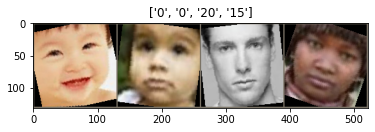

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes]) #이미지 함수 호출

## 학습

In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import time
import copy

from torch.optim import lr_scheduler #validation dataset을 학습시킬 때 조정해주는 scheduler
from torchvision import datasets
from efficientnet_pytorch import EfficientNet

In [ ]:
batch_size = 16
epochs = 30
data_dir = '/content/drive/My Drive/facial_age/'

에폭을 더 늘린다고 정확도가 높아지지는 않았음.

Data Transform

In [ ]:
data_transforms = {'train': transforms.Compose([
    transforms.Resize(200,200),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]),
    'valid': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        transforms.Resize(200,200)
    ])}

Data Loading

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'valid']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = EfficientNet.from_pretrained('efficientnet-b3', num_classes=15)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

since = time.time()

best_model_weights = copy.deepcopy(model.state_dict())
best_acc = 0.0

Loaded pretrained weights for efficientnet-b3


In [ ]:
for epoch in range(epochs):
    print('Epoch {}/{}'.format(epoch, epochs - 1))
    print('-' * 10)

    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()

        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        if phase == 'train':
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        # writer.add_graph('epoch loss', epoch_loss, epoch)
        # writer.add_graph('epoch acc', epoch_acc, epoch)

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            phase, epoch_loss, epoch_acc))

        if phase == 'valid' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_weights = copy.deepcopy(model.state_dict())

Epoch 0/29
----------
train Loss: 0.8416 Acc: 0.6645
valid Loss: 1.0922 Acc: 0.5910
Epoch 1/29
----------
train Loss: 0.8370 Acc: 0.6641
valid Loss: 1.0954 Acc: 0.5903
Epoch 2/29
----------
train Loss: 0.8381 Acc: 0.6654
valid Loss: 1.0956 Acc: 0.5917
Epoch 3/29
----------
train Loss: 0.8385 Acc: 0.6638
valid Loss: 1.0966 Acc: 0.5900
Epoch 4/29
----------
train Loss: 0.8471 Acc: 0.6593
valid Loss: 1.0962 Acc: 0.5887
Epoch 5/29
----------
train Loss: 0.8363 Acc: 0.6678
valid Loss: 1.0953 Acc: 0.5937
Epoch 6/29
----------
train Loss: 0.8361 Acc: 0.6638
valid Loss: 1.0946 Acc: 0.5900
Epoch 7/29
----------
train Loss: 0.8368 Acc: 0.6647
valid Loss: 1.0928 Acc: 0.5920
Epoch 8/29
----------
train Loss: 0.8398 Acc: 0.6647
valid Loss: 1.0944 Acc: 0.5907
Epoch 9/29
----------
train Loss: 0.8354 Acc: 0.6667
valid Loss: 1.0955 Acc: 0.5910
Epoch 10/29
----------
train Loss: 0.8387 Acc: 0.6649
valid Loss: 1.0948 Acc: 0.5890
Epoch 11/29
----------
train Loss: 0.8422 Acc: 0.6628
valid Loss: 1.0975 Ac

In [ ]:

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best val Acc: {:4f}'.format(best_acc))

torch.save(best_model_weights, '/content/drive/My Drive/facial_age/weights/best_weights_b5_class_15.pth')

Training complete in 321m 40s
Best val Acc: 0.593667


In [ ]:
import torch
import cv2
import argparse

from efficientnet_pytorch import EfficientNet

parser = argparse.ArgumentParser()
parser.add_argument("--data", type=str, default='/content/drive/MyDrive/facial_age/train/0/00000A02.jpg')#train/0/00000A02.jpg
opt = parser.parse_args(args=[])

In [ ]:
age_dict = {0:'0~4', 1:'5~9', 2:'10~14', 3:'15~19',4 :'20~24', 5:'25~29', 6:'30~34', 7:'35~39', 8:'40~44',
            9:'45~49', 10:'50~54', 11:'55~59', 12:'60~64', 13:'65~69', 14:'70~85'}

data_dir = opt.data
weight_path = '/content/drive/My Drive/facial_age/weights/best_weights_b5_class_15.pth'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b3', num_classes=15)
model.load_state_dict(torch.load(weight_path))
model.to(device)

model.eval()

Loaded pretrained weights for efficientnet-b3


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [ ]:
try:
  inputs = cv2.imread(data_dir, cv2.IMREAD_GRAYSCALE)
  inputs = cv2.resize(inputs, (128,128))
  ori_img = inputs.copy()
  inputs = inputs[:, :, ::-1].transpose((2, 0, 1)).copy()
  inputs = torch.from_numpy(inputs).float().div(255.0).unsqueeze(0)
  inputs = inputs.cuda()
except Exception as e:
  print(str(e))

too many indices for array


In [ ]:
def imshow(inp,cmap=None):  

  inp = inp.numpy().transpose((1, 2, 0))

  mean = np.array([0.485, 0.456, 0.406])

  std = np.array([0.229, 0.224, 0.225])

  inp = std * inp + mean

  inp = np.clip(inp, 0, 1)

  plt.imshow(inp,cmap)

In [ ]:
preds[0].item()

5

In [ ]:
import torchvision

import torchvision.transforms as transforms

from torchvision.datasets import ImageFolder
inputs, classes = next(iter(dataloaders['valid'])) # test/un/0.jpg
imag = inputs
inputs = inputs.cuda()
outputs = model(inputs)
_, preds = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(imag[0]))
#cv2.putText(ori_img, str(age_dict[preds.item()]),(75, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,0,0))
print(str(age_dict[preds[0].item()]))
#cv2.imshow('result', ori_img)
#cv2.waitKey(0)

NameError: ignored